In [1]:
from IPython.core.display import SVG



import pandas as pd

import yaml

In [2]:
%run imho

In [3]:
with open("style.yaml") as stream:
    try:
        style = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [4]:
relations = pd.read_csv('rdsv/rdsv-20241220-relations.csv')

In [5]:
relations

,Subject,Verb,Object,Source,Coder,Comments,TO DO
0,people,transform,science,NaN,PW,NaN,No unclear triples or unspecific terms -- can ...
1,design,creates,bias,NaN,PW,NaN,NaN
2,incentives,creates,bias,TN,PW,NaN,NaN
3,regulators,lack,capacity,IS,PW,NaN,NaN
4,technology,enables,capacity,NaN,PW,NaN,NaN
...,...,...,...,...,...,...,...
58,grand challenge,creates,shared belief,NaN,PW,NaN,NaN
59,science,transforms,products,NaN,PW,"But, via technology, no? Or through design?",NaN
60,technology,impacts,society,NaN,PW,NaN,NaN
61,AI training,influences,bias,NaN,PW,AI bias?,NaN


In [6]:
hege_raw = None

with open("rdsv/rdsv-20241212.yaml") as stream:
    try:
        hege_raw = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [7]:
hege_raw

{'entity-types': [{'name': 'person',
   'graphviz': {'shape': 'box'},
   'subtypes': [{'name': 'individual'},
    {'name': 'corporation', 'graphviz': {'style': 'rounded'}}]},
  {'name': 'institution', 'graphviz': {'shape': 'hexagon'}},
  {'name': 'information',
   'graphviz': {'shape': 'note'},
   'subtypes': [{'name': 'code'},
    {'name': 'standard'},
    {'name': 'model'},
    {'name': 'content'}]},
  {'name': 'machine', 'graphviz': {'shape': 'ellipse'}},
  {'name': 'service', 'graphviz': {'shape': 'ellipse'}},
  {'name': 'use case', 'graphviz': {'shape': 'plain'}},
  {'name': 'future',
   'graphviz': {'shape': 'round'},
   'subtypes': [{'name': 'Societal Impact'}, {'name': 'Tech Adaption'}]}],
 'relation-types': [{'owns': {'subject': 'person'}},
  {'governs': {'subject': 'institution'}},
  {'implements': {'object': 'standard'}},
  {'creates': {'subject': 'person', 'object': 'information'}},
  {'operates': {'subject': 'corporaton', 'object': 'machine'}}],
 'entities': [{'name': 'Bia

In [8]:
G = data_to_graph(style, relations)

In [9]:
G.nodes()

NodeView(('people', 'science', 'design', 'bias', 'incentives', 'regulators', 'capacity', 'technology', 'shared interest', 'collaboration', 'corporations', 'compliance', 'consumers', 'AI explainability', 'conversation', 'policy', 'supply chain', 'AI training', 'behavior model', 'intervetions', 'regulation', 'monopoly', 'lobbyists', 'data', 'measurement', 'countries', 'products', 'economy', 'society', 'economic forecasting', 'shared belief', 'environment', 'future', 'inherent pluralities', 'geopolitical strategy', 'government', 'oversight', 'development', 'interventions', 'institutions', 'research', 'grand challenge', 'researchers', 'law', 'technology adoption', 'law suits', 'lawmakers', 'market pressure', 'overhyped research', 'sponsors', 'research incentives', 'risk mitigation', 'technology gains', 'social change', 'fundamental questions', 'technologists', 'societal impact', 'technical problems', 'government behavior', 'the equilibrium', 'law enforcement', 'digital divide', 'the ultima

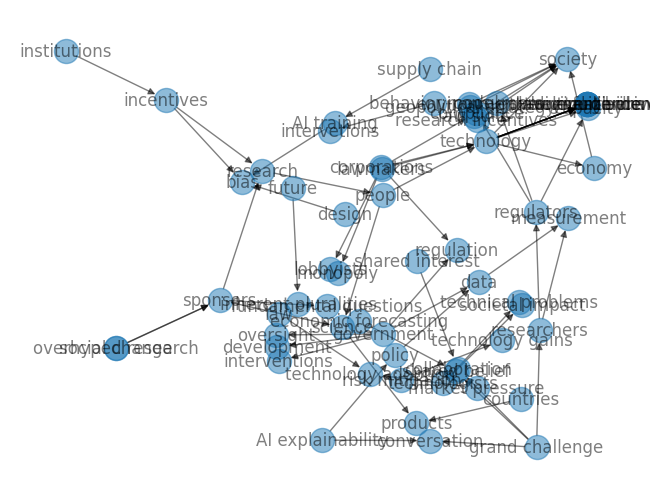

In [10]:
nx.draw_kamada_kawai(G, with_labels=True, alpha = 0.5)

In [11]:
graphviz_lookup('content', style)

{'shape': 'note'}

In [12]:
imho_dot = imho_graph_to_dot(G, style, layout = 'dot')

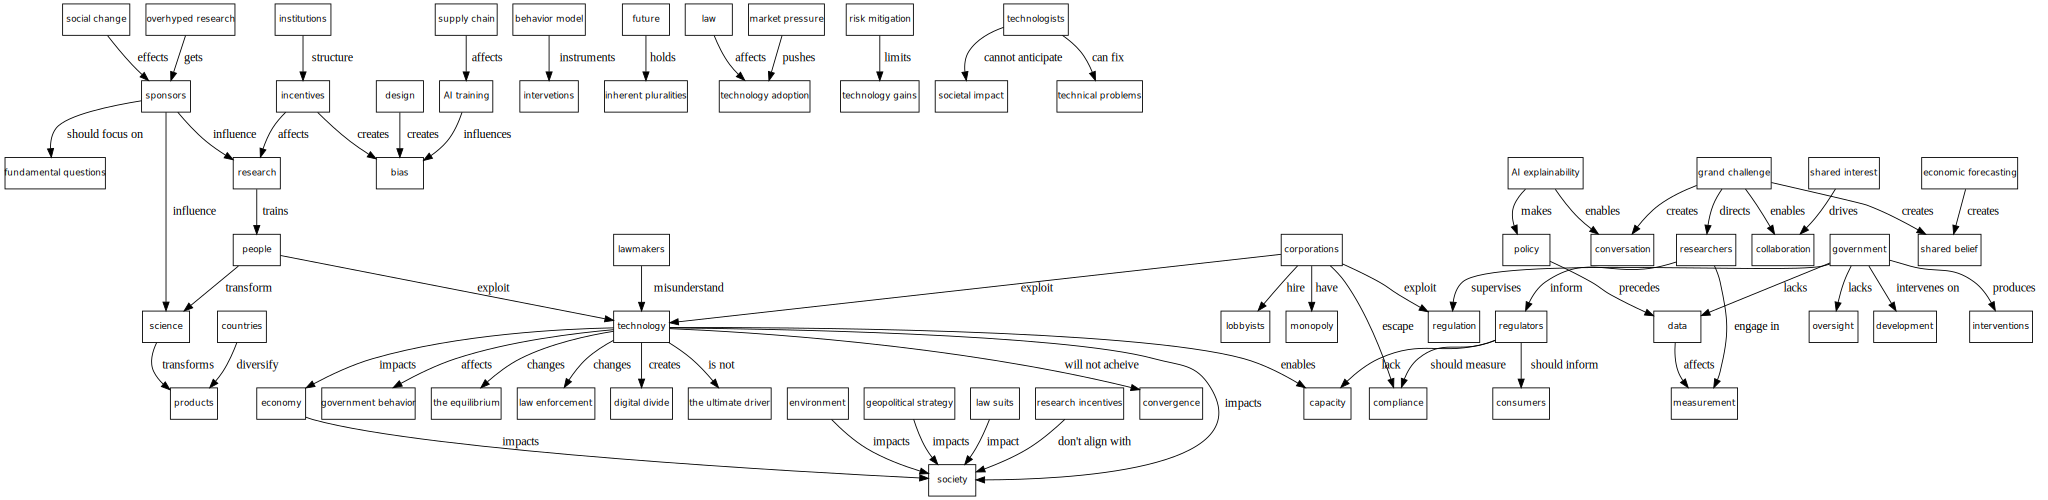

In [13]:
SVG(data = imho_dot.create_svg())

In [14]:
imho_dot.write_png('rdsv-20241220.png')